In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [9]:
import scienceplots

In [10]:
plt.style.use(['science',"ieee"])  #In this command ieee has higher priority than science if available
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['text.usetex'] = False

In [11]:
import h5py
from os import listdir
from os.path import isfile, join

def get_results(model, exp_folder):
    
    
    onlyfiles = [f for f in listdir(f"./results/{model}/{exp_folder}") \
                 if isfile(join(f"./results/{model}/{exp_folder}", f))]
    glob_acc_lst = []
    train_loss_lst = []
    test_acc_lst = []
    test_loss_lst = []
    for file in onlyfiles:
        f = h5py.File(f'./results/{model}/{exp_folder}/{file}', 'r')
        print(file)
        glob_acc_lst.append(f['rs_glob_acc'][:])
        train_loss_lst.append(f['rs_train_loss'][:])
        test_loss_lst.append(f['rs_test_loss'][:])
        test_acc_lst.append(f['rs_test_acc'][:])
        f.close()
    return glob_acc_lst, train_loss_lst, test_acc_lst, test_loss_lst



In [12]:
def get_mu_std(lst):
    mu = np.array(lst).mean(axis=0)
    std = np.array(lst).std(axis=0)
    return mu, std

## MLP-MNIST

In [13]:
MLP_MNIST_Sophia = get_results('mlp', 'mnist-sophia')
MLP_MNIST_DONE = get_results('mlp', 'mnist-done')
MLP_MNIST_FedAvg = get_results('mlp', 'mnist-fedavg')

mlp_mnist_sophia_loss = MLP_MNIST_Sophia[-1]
mlp_mnist_sophia_acc = MLP_MNIST_Sophia[-2]

mlp_mnist_done_loss = MLP_MNIST_DONE[-1]
mlp_mnist_done_acc = MLP_MNIST_DONE[-2]

mlp_mnist_fedavg_loss = MLP_MNIST_FedAvg[-1]
mlp_mnist_fedavg_acc = MLP_MNIST_FedAvg[-2]

Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_0.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_1.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_2.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_3.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_4.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_0.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_1.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_2.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_3.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_4.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_0(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_1(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_2(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_3(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_4(1).h5


In [14]:
# mu/std for losses
mlp_mnist_sophia_loss_mu, mlp_mnist_sophia_loss_std = get_mu_std(mlp_mnist_sophia_loss)
mlp_mnist_done_loss_mu, mlp_mnist_done_loss_std = get_mu_std(mlp_mnist_done_loss)
mlp_mnist_fedavg_loss_mu, mlp_mnist_fedavg_loss_std = get_mu_std(mlp_mnist_fedavg_loss)

# mu/std for acc
mlp_mnist_sophia_acc_mu, mlp_mnist_sophia_acc_std = get_mu_std(mlp_mnist_sophia_acc)
mlp_mnist_done_acc_mu, mlp_mnist_done_acc_std = get_mu_std(mlp_mnist_done_acc)
mlp_mnist_fedavg_acc_mu, mlp_mnist_fedavg_acc_std = get_mu_std(mlp_mnist_fedavg_acc)



In [ ]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_mnist_fedavg_loss_mu, mlp_mnist_sophia_loss_mu, mlp_mnist_done_loss_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])



# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_loss_mlp_mnist.png')
# Display the plot
plt.show()


In [16]:
# extend mlp_mnist_fedavg_acc_mu to be 1000 elements not 100
# every elment is repeated 10 times

mlp_mnist_fedavg_acc_mu_ext, mlp_mnist_sophia_acc_mu_ext, mlp_mnist_done_acc_mu_ext = [], [], []
for i in range(100):
    for j in range(10):
        mlp_mnist_fedavg_acc_mu_ext.append(mlp_mnist_fedavg_acc_mu[i])
        mlp_mnist_sophia_acc_mu_ext.append(mlp_mnist_sophia_acc_mu[i])

In [17]:
for i in range(100):
    for j in range(80):
        mlp_mnist_done_acc_mu_ext.append(mlp_mnist_done_acc_mu[i])

In [18]:
len(mlp_mnist_fedavg_acc_mu_ext), len(mlp_mnist_sophia_acc_mu_ext), len(mlp_mnist_done_acc_mu_ext)

(1000, 1000, 8000)

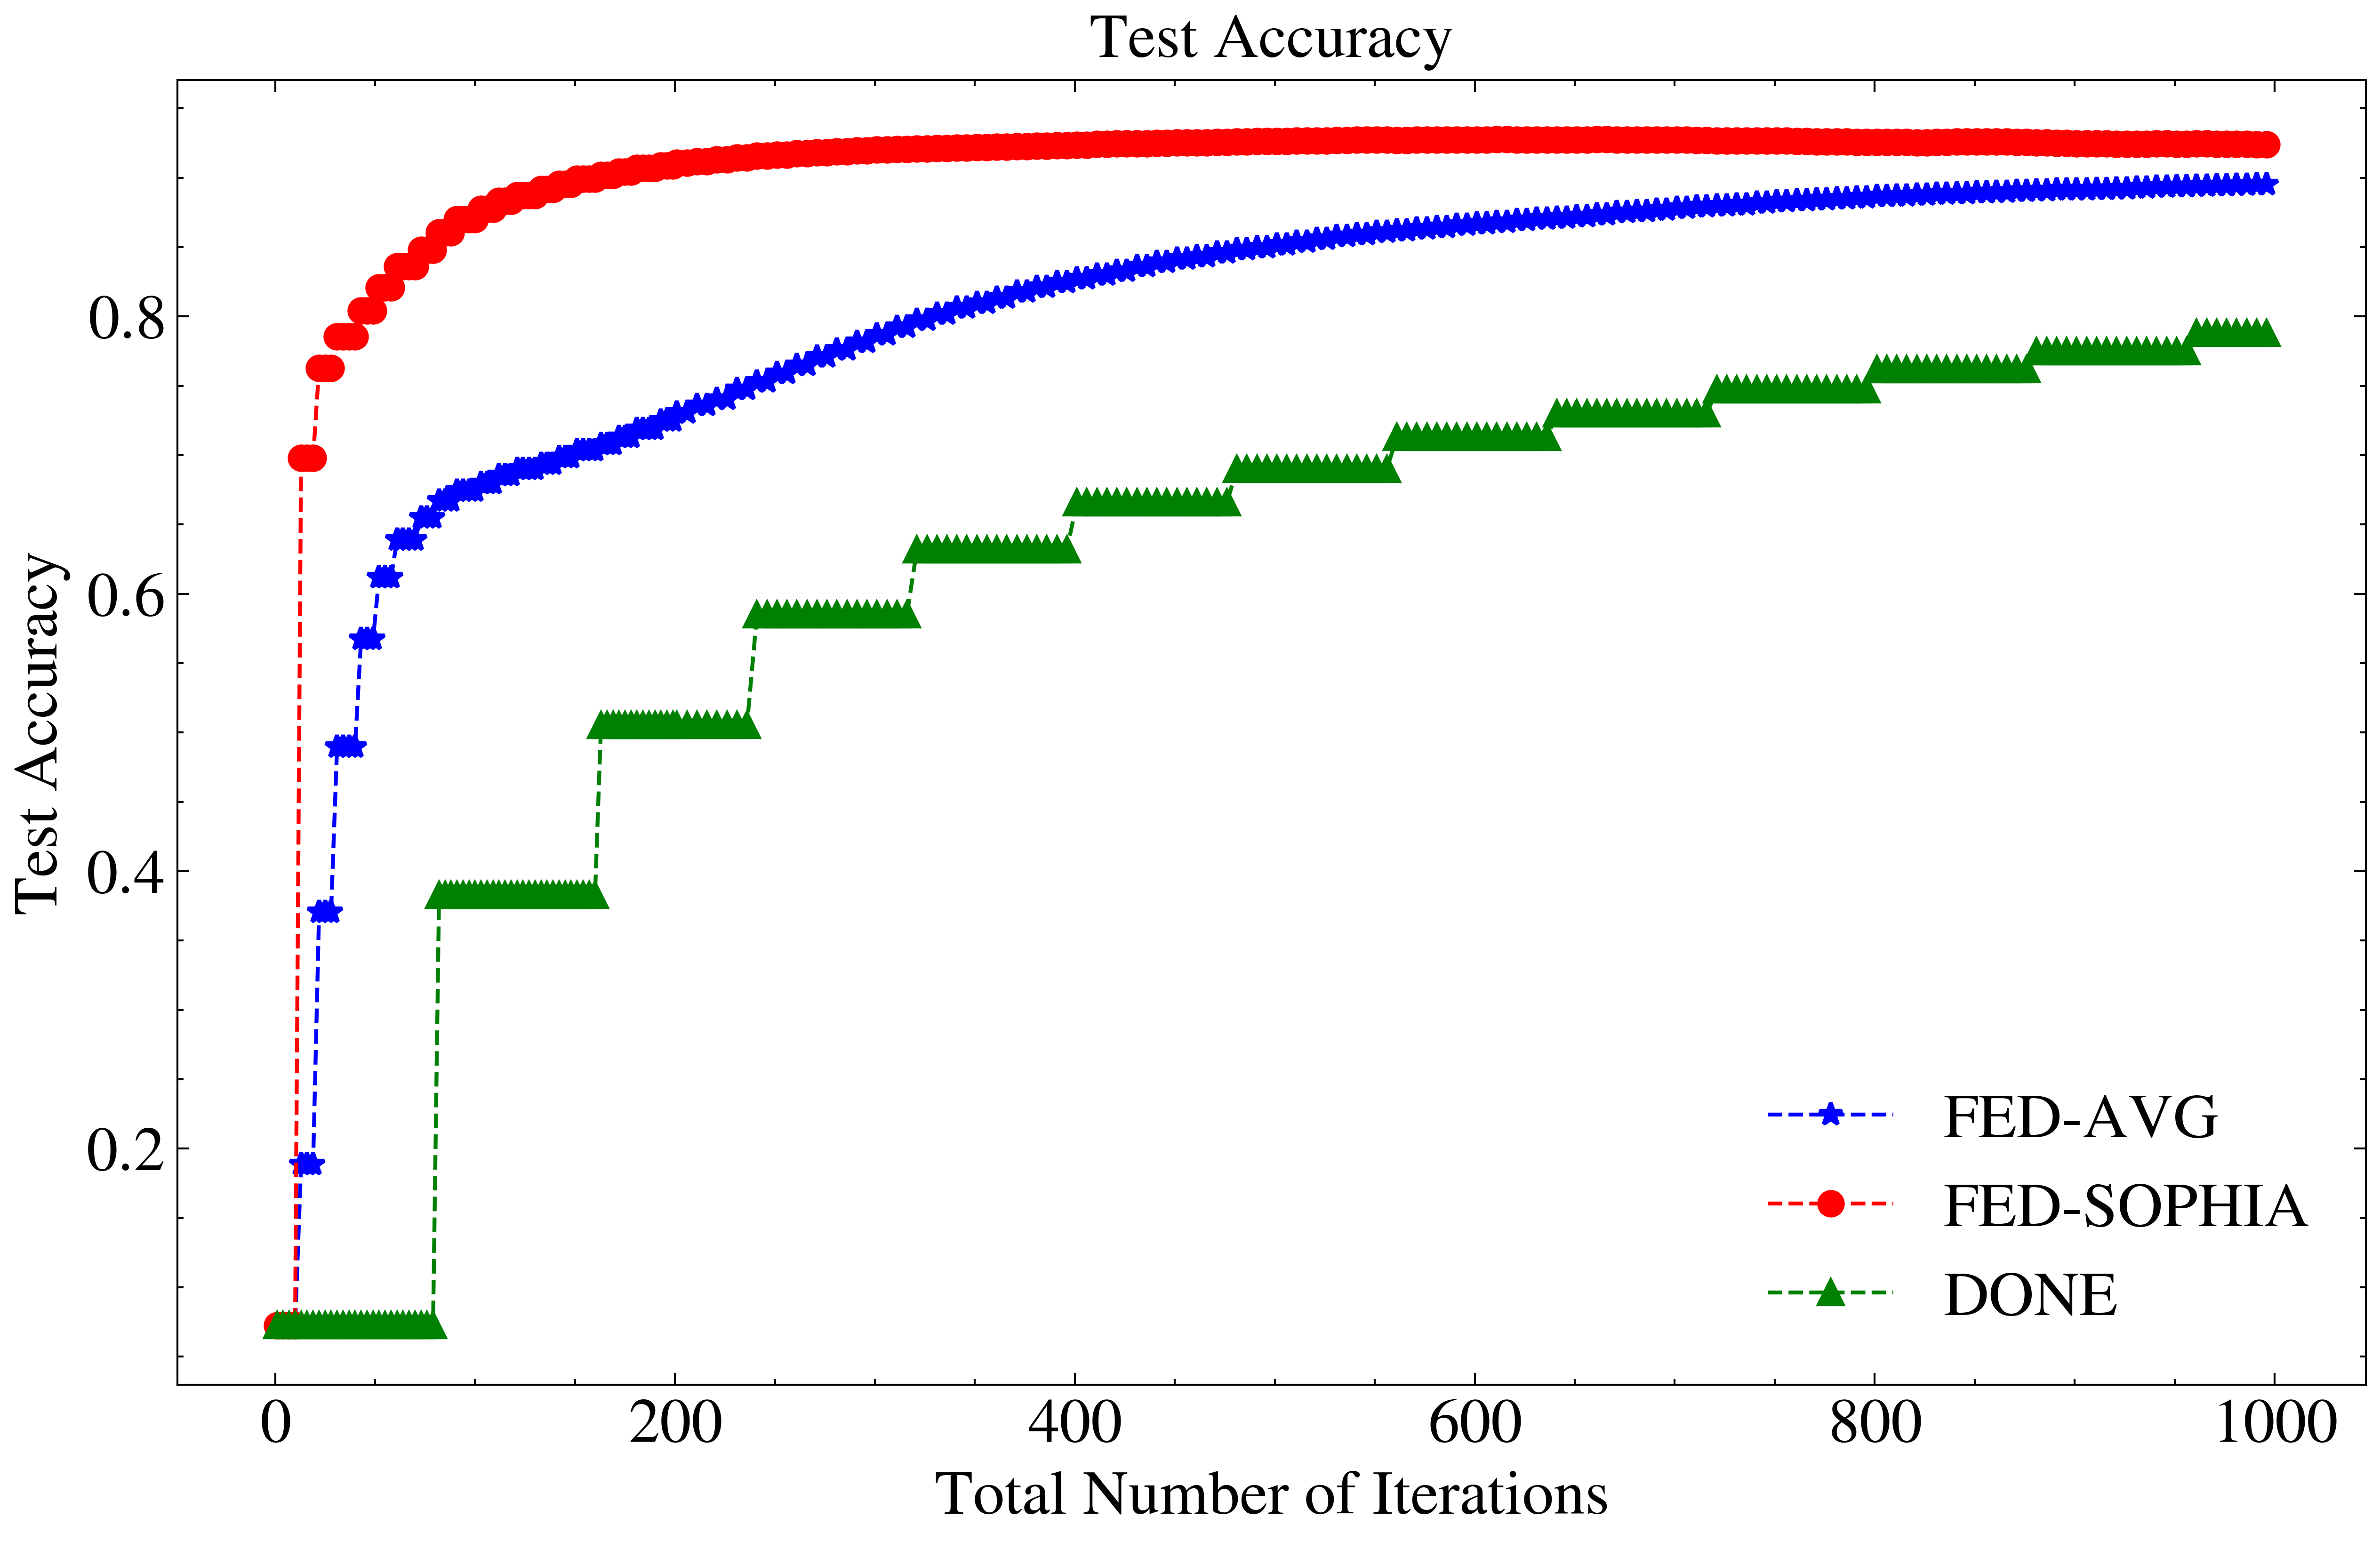

In [24]:
# plot the total number of iteration (number of local epochs * number of communication rounds) vs the accuracy

fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 100*10+1)  # Assuming 100 iterations
avgs = [mlp_mnist_fedavg_acc_mu_ext, mlp_mnist_sophia_acc_mu_ext, mlp_mnist_done_acc_mu_ext[:1000]]

for i in range(3):
    ax.plot(iterations[:20*10:3], [avgs[i][j] for j in range(0, 20*10, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20*10::5], [avgs[i][j] for j in range(20*10, 100*10, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])


# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Total Number of Iterations', fontsize=16)
ax.set_ylabel('Test Accuracy', fontsize=16)
ax.set_title('Test Accuracy', fontsize=16)
ax.legend(prop={'size': 16})
#set size for axis names
plt.tick_params(labelsize=16)
# save plot
plt.savefig('test_acc_mlp_mnist.pdf')
# Display the plot
plt.show()


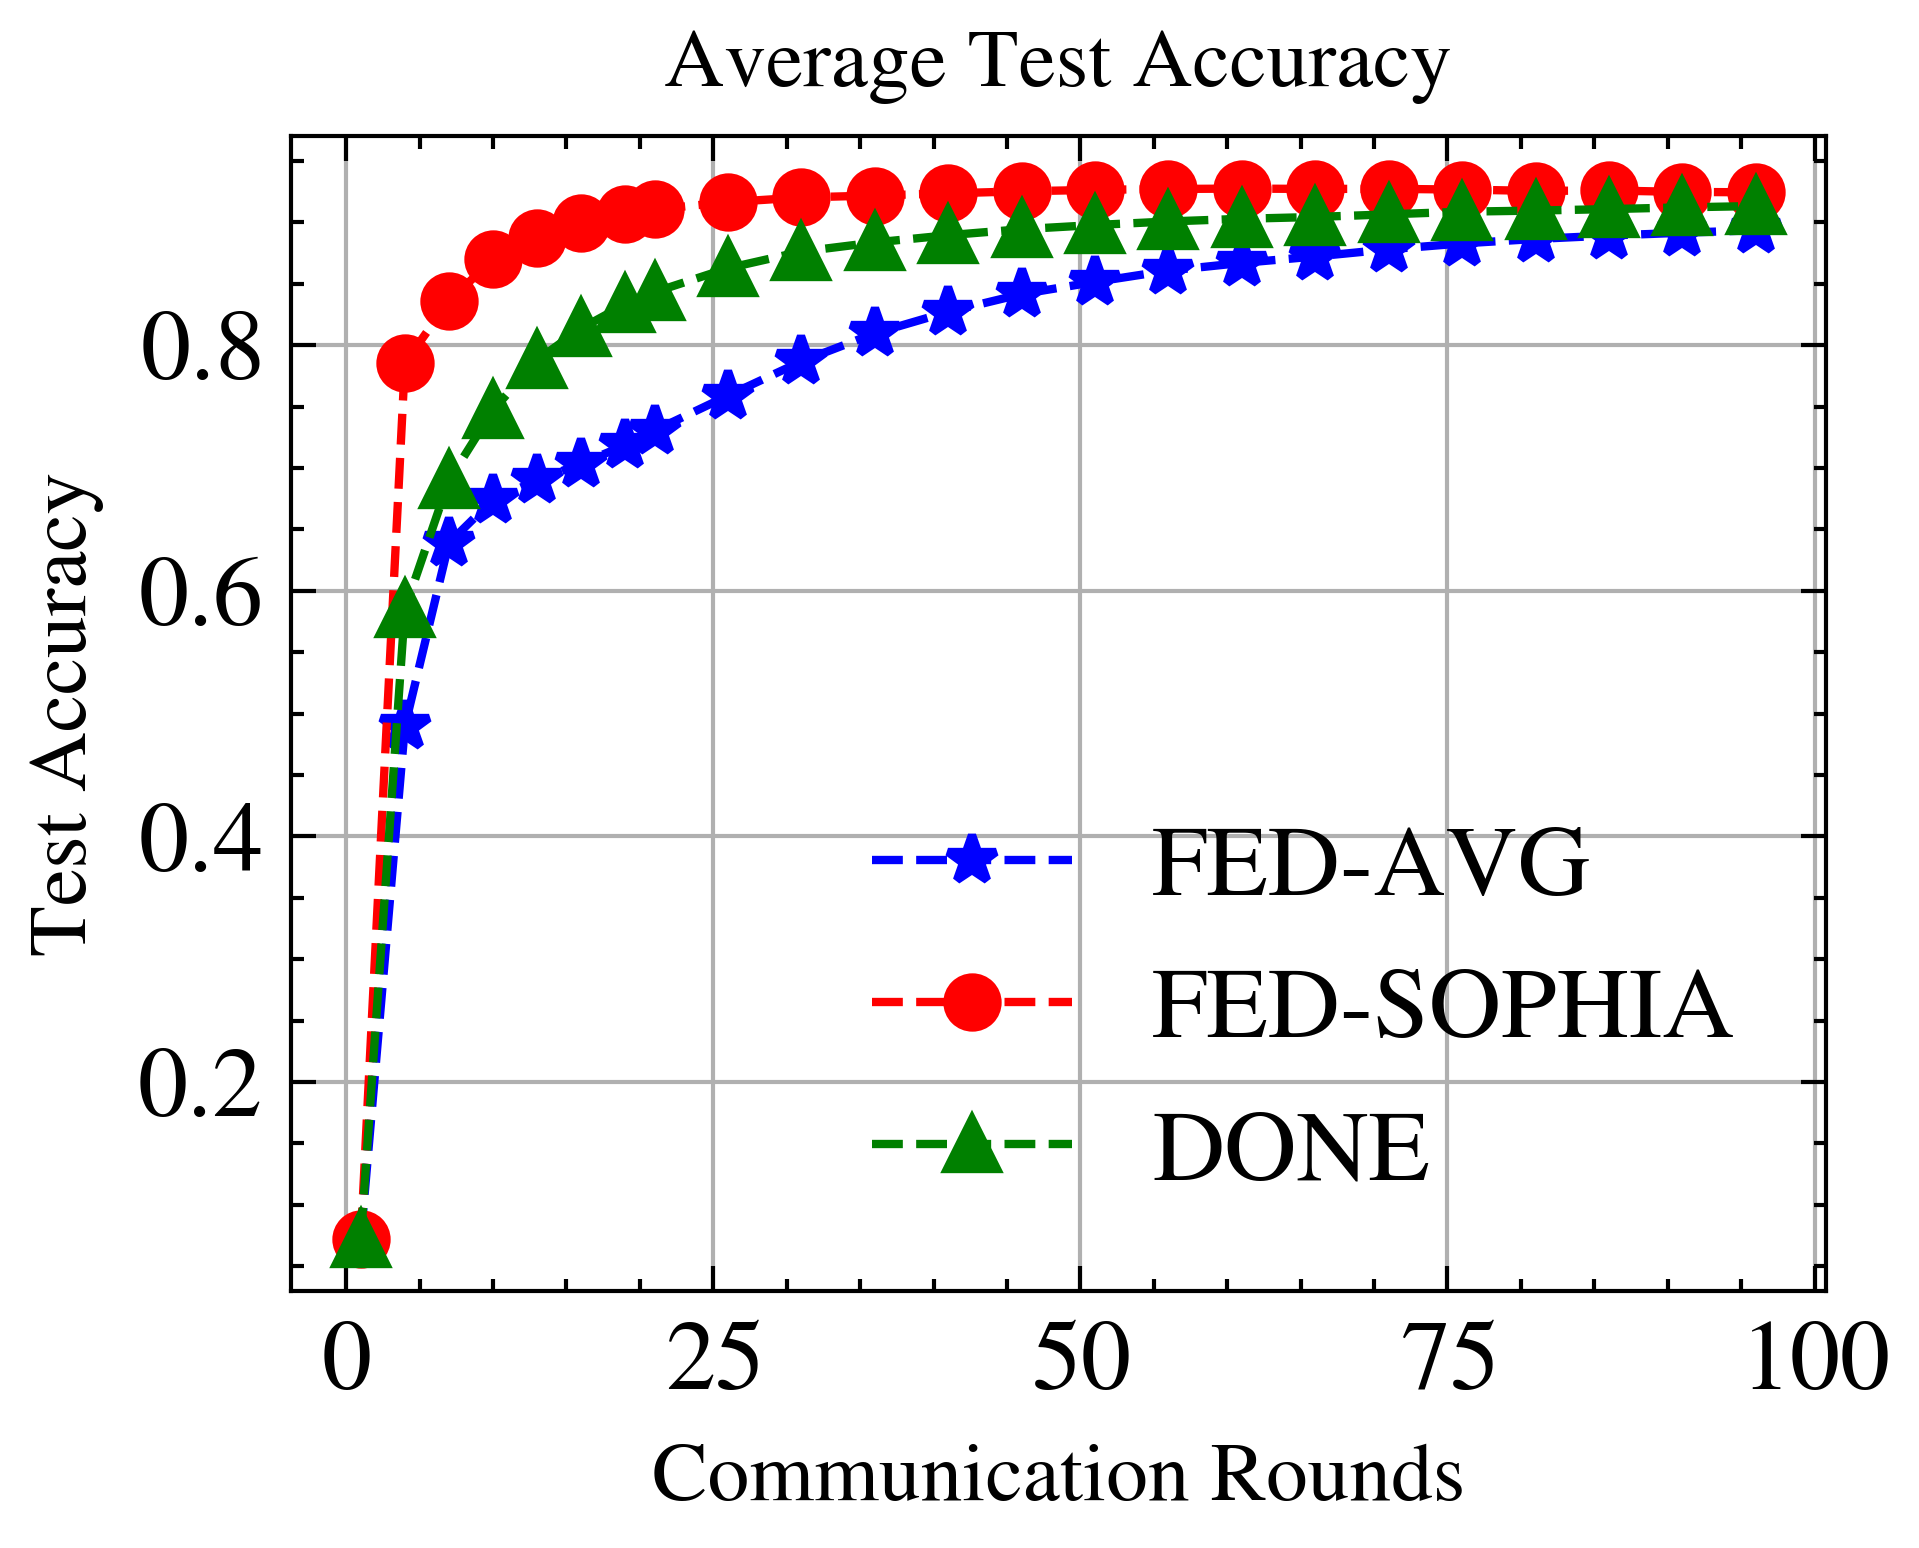

In [27]:
# same as above but for accuracy
fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_mnist_fedavg_acc_mu, mlp_mnist_sophia_acc_mu, mlp_mnist_done_acc_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy',  fontsize=10)
ax.set_title('Average Test Accuracy', fontsize=10)
#set size for legend
ax.legend(prop={'size': 12})
#set size for axis names
plt.tick_params(labelsize=12)
ax.grid(True)
# save plot
plt.savefig('test_acc_mlp_mnist.pdf')
# Display the plot
plt.show()

## MLP-FMNIST

In [28]:
MLP_FMNIST_Sophia = get_results('mlp', 'fmnist-sophia')
MLP_FMNIST_DONE = get_results('mlp', 'fmnist-done')
MLP_FMNIST_FedAvg = get_results('mlp', 'fmnist-fedavg')

mlp_fmnist_sophia_loss = MLP_FMNIST_Sophia[-1]
mlp_fmnist_sophia_acc = MLP_FMNIST_Sophia[-2]

mlp_fmnist_done_loss = MLP_FMNIST_DONE[-1]
mlp_fmnist_done_acc = MLP_FMNIST_DONE[-2]

mlp_fmnist_fedavg_loss = MLP_FMNIST_FedAvg[-1]
mlp_fmnist_fedavg_acc = MLP_FMNIST_FedAvg[-2]


Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_0.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_1.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_2.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_3.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_4.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_0.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_1.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_2.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_3.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_4.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_0.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_1.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_2.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_3.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_4.h5


In [29]:
mlp_fmnist_sophia_loss_mu, mlp_fmnist_sophia_loss_std = get_mu_std(mlp_fmnist_sophia_loss)
mlp_fmnist_done_loss_mu, mlp_fmnist_done_loss_std = get_mu_std(mlp_fmnist_done_loss)
mlp_fmnist_fedavg_loss_mu, mlp_fmnist_fedavg_loss_std = get_mu_std(mlp_fmnist_fedavg_loss)

# mu/std for acc
mlp_fmnist_sophia_acc_mu, mlp_fmnist_sophia_acc_std = get_mu_std(mlp_fmnist_sophia_acc)
mlp_fmnist_done_acc_mu, mlp_fmnist_done_acc_std = get_mu_std(mlp_fmnist_done_acc)
mlp_fmnist_fedavg_acc_mu, mlp_fmnist_fedavg_acc_std = get_mu_std(mlp_fmnist_fedavg_acc)


In [ ]:
# plot loss
fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_fmnist_fedavg_loss_mu, mlp_fmnist_sophia_loss_mu, mlp_fmnist_done_loss_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy',  fontsize=10)
ax.set_title('Average Test Accuracy', fontsize=10)
#set size for legend
ax.legend(prop={'size': 12})
#set size for axis names
plt.tick_params(labelsize=12)
ax.grid(True)
# save plot
# Display the plot
plt.savefig('test_loss_mlp_fmnist.pdf')
# Display the plot
plt.show()


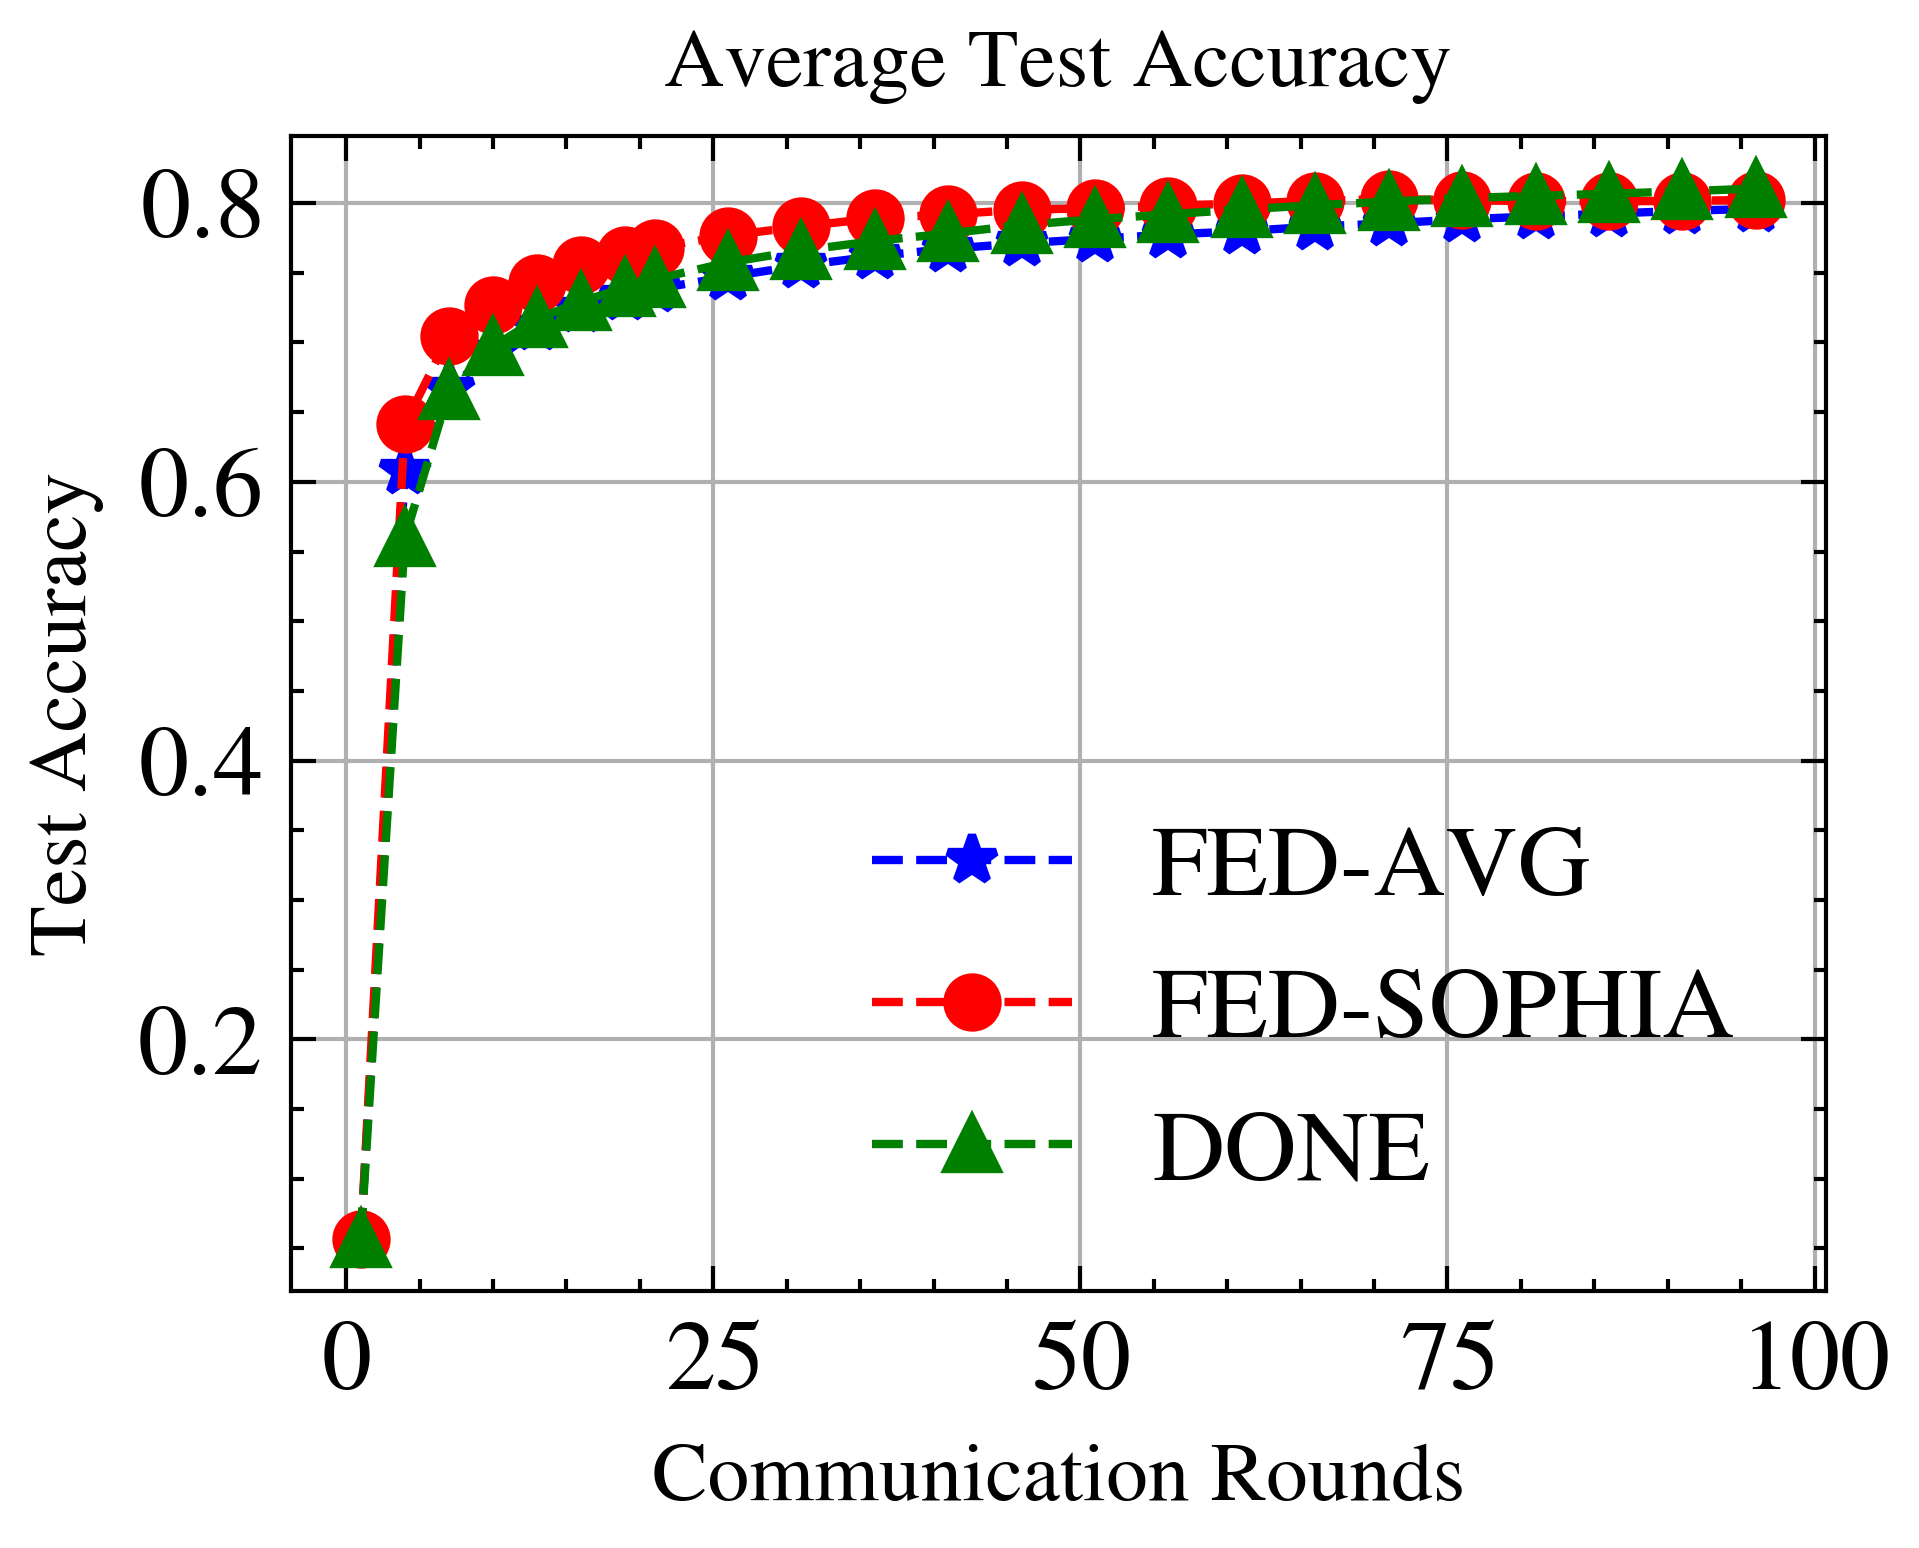

In [36]:
# plot acc
fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_fmnist_fedavg_acc_mu, mlp_fmnist_sophia_acc_mu, mlp_fmnist_done_acc_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy',  fontsize=10)
ax.set_title('Average Test Accuracy', fontsize=10)
#set size for legend
ax.legend(prop={'size': 12})
#set size for axis names
plt.tick_params(labelsize=12)
ax.grid(True)
# save plot
# Display the plot
# save plot
plt.savefig('test_acc_mlp_fmnist.pdf')
# Display the plot
plt.show()


## CNN-MNIST


In [37]:
CNN_MNIST_Sophia = get_results('cnn', 'mnist-sophia')
CNN_MNIST_DONE = get_results('cnn', 'mnist-done')
CNN_MNIST_FedAvg = get_results('cnn', 'mnist-fedavg')

cnn_mnist_sophia_loss = CNN_MNIST_Sophia[-1]
cnn_mnist_sophia_acc = CNN_MNIST_Sophia[-2]

cnn_mnist_done_loss = CNN_MNIST_DONE[-1]
cnn_mnist_done_acc = CNN_MNIST_DONE[-2]

cnn_mnist_fedavg_loss = CNN_MNIST_FedAvg[-1]
cnn_mnist_fedavg_acc = CNN_MNIST_FedAvg[-2]


Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_512b_10_0.h5
Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_512b_10_1.h5
Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_512b_10_2.h5
Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_512b_10_3.h5
Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_512b_10_4.h5
Mnist_DONE_1_0.0005_0.05_0.02_32u_0b_120_0.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_0.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_1.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_2.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_3.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_4.h5


In [38]:
cnn_mnist_sophia_loss_mu, cnn_mnist_sophia_loss_std = get_mu_std(cnn_mnist_sophia_loss)
cnn_mnist_done_loss_mu, cnn_mnist_done_loss_std = get_mu_std(cnn_mnist_done_loss)
cnn_mnist_fedavg_loss_mu, cnn_mnist_fedavg_loss_std = get_mu_std(cnn_mnist_fedavg_loss)

# mu/std for acc
cnn_mnist_sophia_acc_mu, cnn_mnist_sophia_acc_std = get_mu_std(cnn_mnist_sophia_acc)
cnn_mnist_done_acc_mu, cnn_mnist_done_acc_std = get_mu_std(cnn_mnist_done_acc)
cnn_mnist_fedavg_acc_mu, cnn_mnist_fedavg_acc_std = get_mu_std(cnn_mnist_fedavg_acc)


In [ ]:
# plot loss
fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_fedavg_loss_mu, cnn_mnist_sophia_loss_mu, cnn_mnist_done_loss_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy',  fontsize=10)
ax.set_title('Average Test Accuracy', fontsize=10)
#set size for legend
ax.legend(prop={'size': 12})
#set size for axis names
plt.tick_params(labelsize=12)
ax.grid(True)
# save plot
# Display the plot
# save plot
plt.savefig('test_loss_cnn_mnist.pdf')
# Display the plot
plt.show()


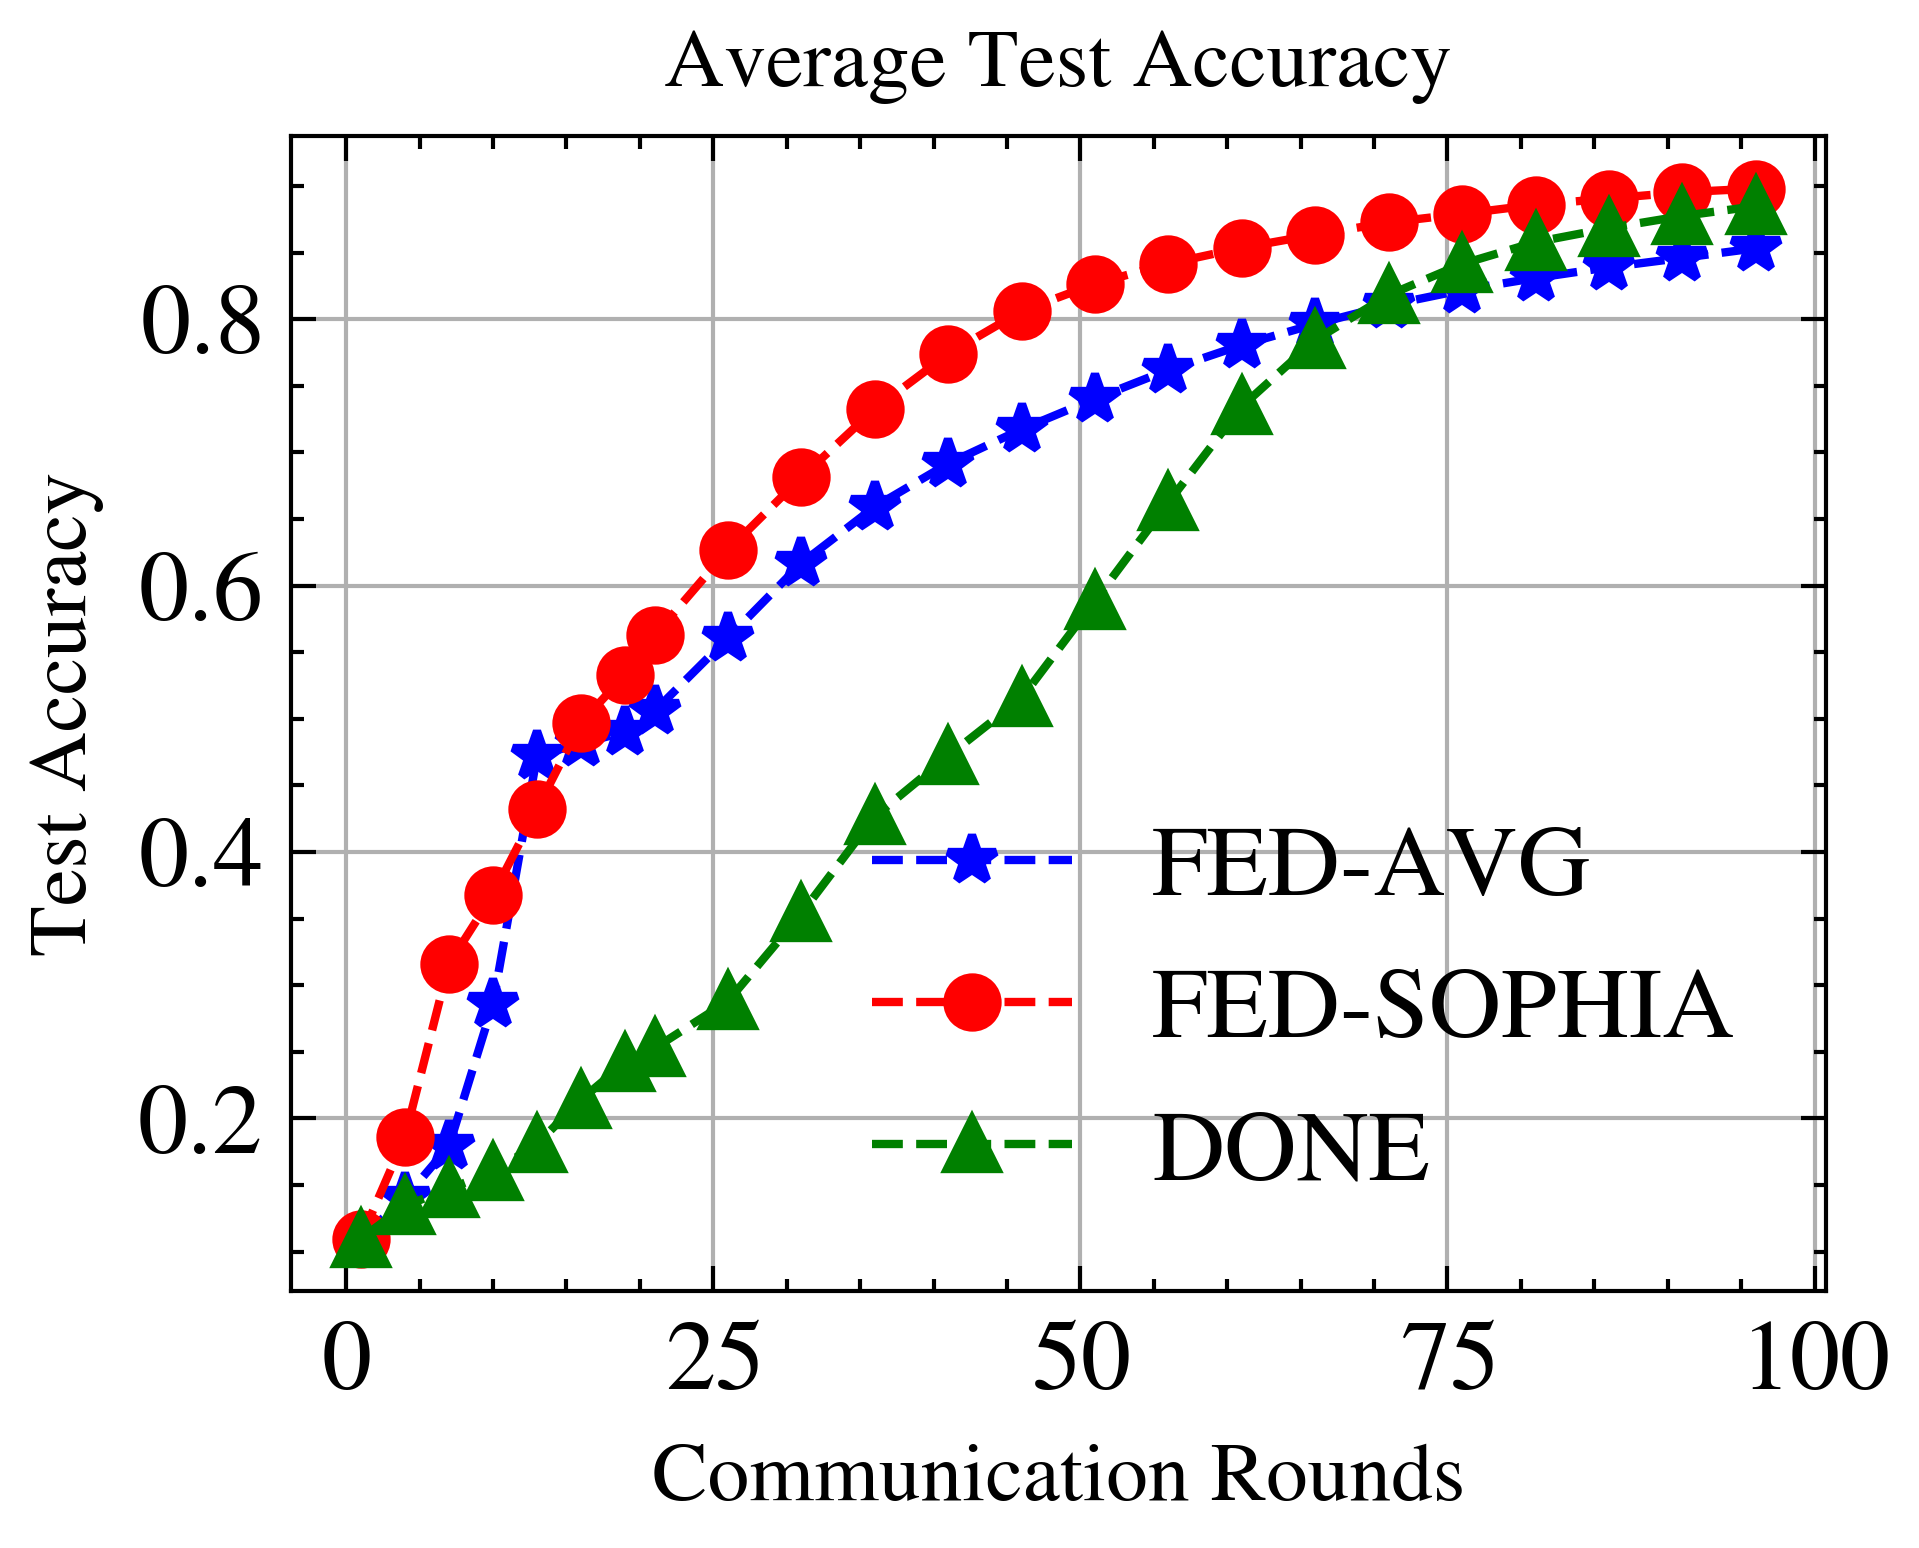

In [40]:
# plot accuracy
fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_fedavg_acc_mu, cnn_mnist_sophia_acc_mu, cnn_mnist_done_acc_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy',  fontsize=10)
ax.set_title('Average Test Accuracy', fontsize=10)
#set size for legend
ax.legend(prop={'size': 12})
#set size for axis names
plt.tick_params(labelsize=12)
ax.grid(True)
# save plot
plt.savefig('test_acc_cnn_mnist.pdf')
# Display the plot
plt.show()


## CNN-FMNIST

## LR effect

In [5]:
Sophia_lr = get_results('cnn', 'lr')

cnn_mnist_sophia_loss_lr_01 = Sophia_lr[-1][0]
cnn_mnist_sophia_acc_lr_01 = Sophia_lr[-2][0]

cnn_mnist_sophia_loss_lr_003 = Sophia_lr[-1][1]
cnn_mnist_sophia_acc_lr_003 = Sophia_lr[-2][1]

cnn_mnist_sophia_loss_lr_0005 = Sophia_lr[-1][2]
cnn_mnist_sophia_acc_lr_0005 = Sophia_lr[-2][2]


Fashion_Mnist_Sophia_0.01_0.03_1.0_0.001_32u_512b_10_0.h5
Fashion_Mnist_Sophia_0.003_0.03_1.0_0.001_32u_512b_10_0.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_512b_10_0.h5


In [9]:
cnn_mnist_sophia_acc_lr_01[-1]

0.7638105975197295

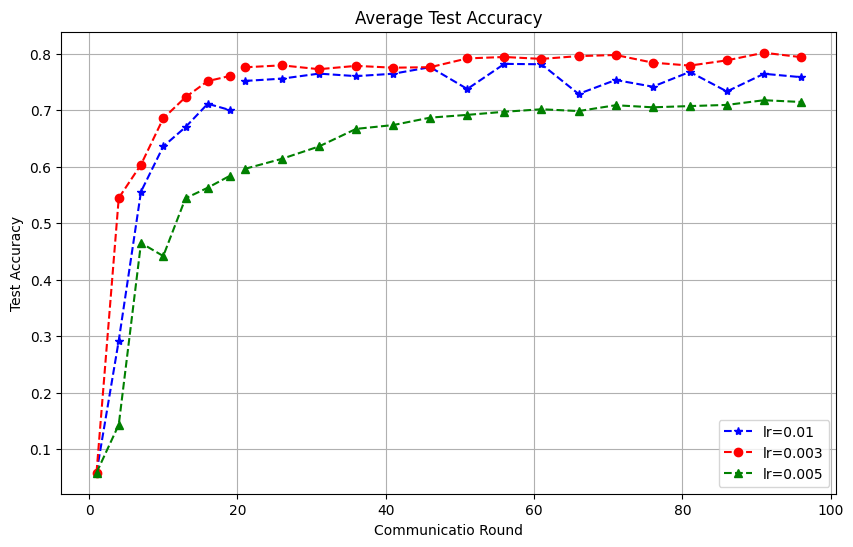

In [64]:
# plot accuracy(no averages this time just one run)
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['lr=0.01', 'lr=0.003', 'lr=0.005']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_sophia_acc_lr_01, cnn_mnist_sophia_acc_lr_003, cnn_mnist_sophia_acc_lr_0005]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_cnn_mnist_lr.png')
# Display the plot
plt.show()


In [10]:
Sophia_epochs = get_results('cnn', 'epochs')

cnn_mnist_sophia_loss_epochs_5 = Sophia_epochs[-1][0]
cnn_mnist_sophia_acc_epochs_5 = Sophia_epochs[-2][0]

cnn_mnist_sophia_loss_epochs_1 = Sophia_epochs[-1][1]
cnn_mnist_sophia_acc_epochs_1 = Sophia_epochs[-2][1]

cnn_mnist_sophia_loss_epochs_10 = Sophia_epochs[-1][2]
cnn_mnist_sophia_acc_epochs_10 = Sophia_epochs[-2][2]



Fashion_Mnist_Sophia_0.001_0.03_1.0_0.001_32u_512b_5_0.h5
Fashion_Mnist_Sophia_0.001_0.03_1.0_0.001_32u_512b_1_0.h5
Fashion_Mnist_Sophia_0.001_0.03_1.0_0.001_32u_512b_10_0.h5


In [13]:
cnn_mnist_sophia_acc_epochs_5[-1]

0.7331595264937993

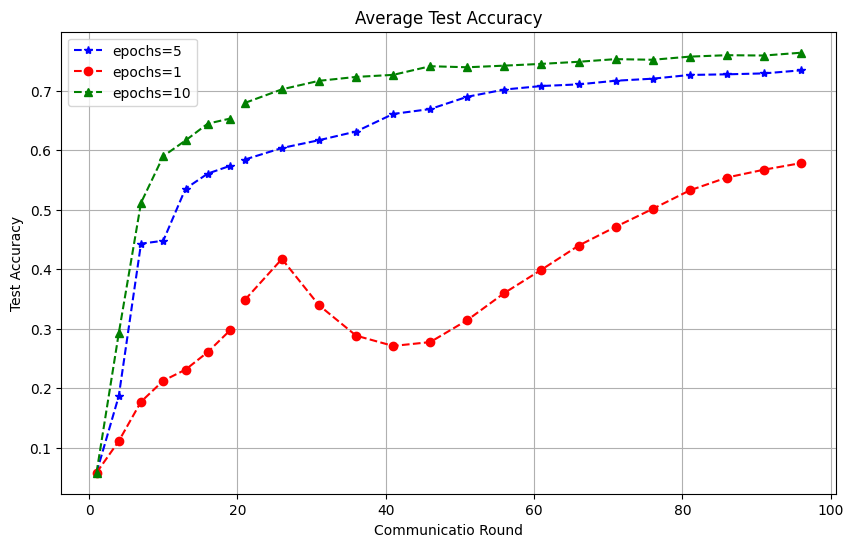

In [68]:
# plot accuracy(no averages this time just one run)
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['epochs=5', 'epochs=1', 'epochs=10']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_sophia_acc_epochs_5, cnn_mnist_sophia_acc_epochs_1, cnn_mnist_sophia_acc_epochs_10]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_cnn_mnist_epochs.png')
# Display the plot
plt.show()


## Utils

In [41]:
import sympy as sp

# Define the symbols
w, b = sp.symbols('w b')

# Define the loss function
loss = w**2 + 2*w*b + 3*b**2

# Calculate the Hessian matrix
hessian_matrix = sp.hessian(loss, (w, b))
print(hessian_matrix)


Matrix([[2, 2], [2, 6]])


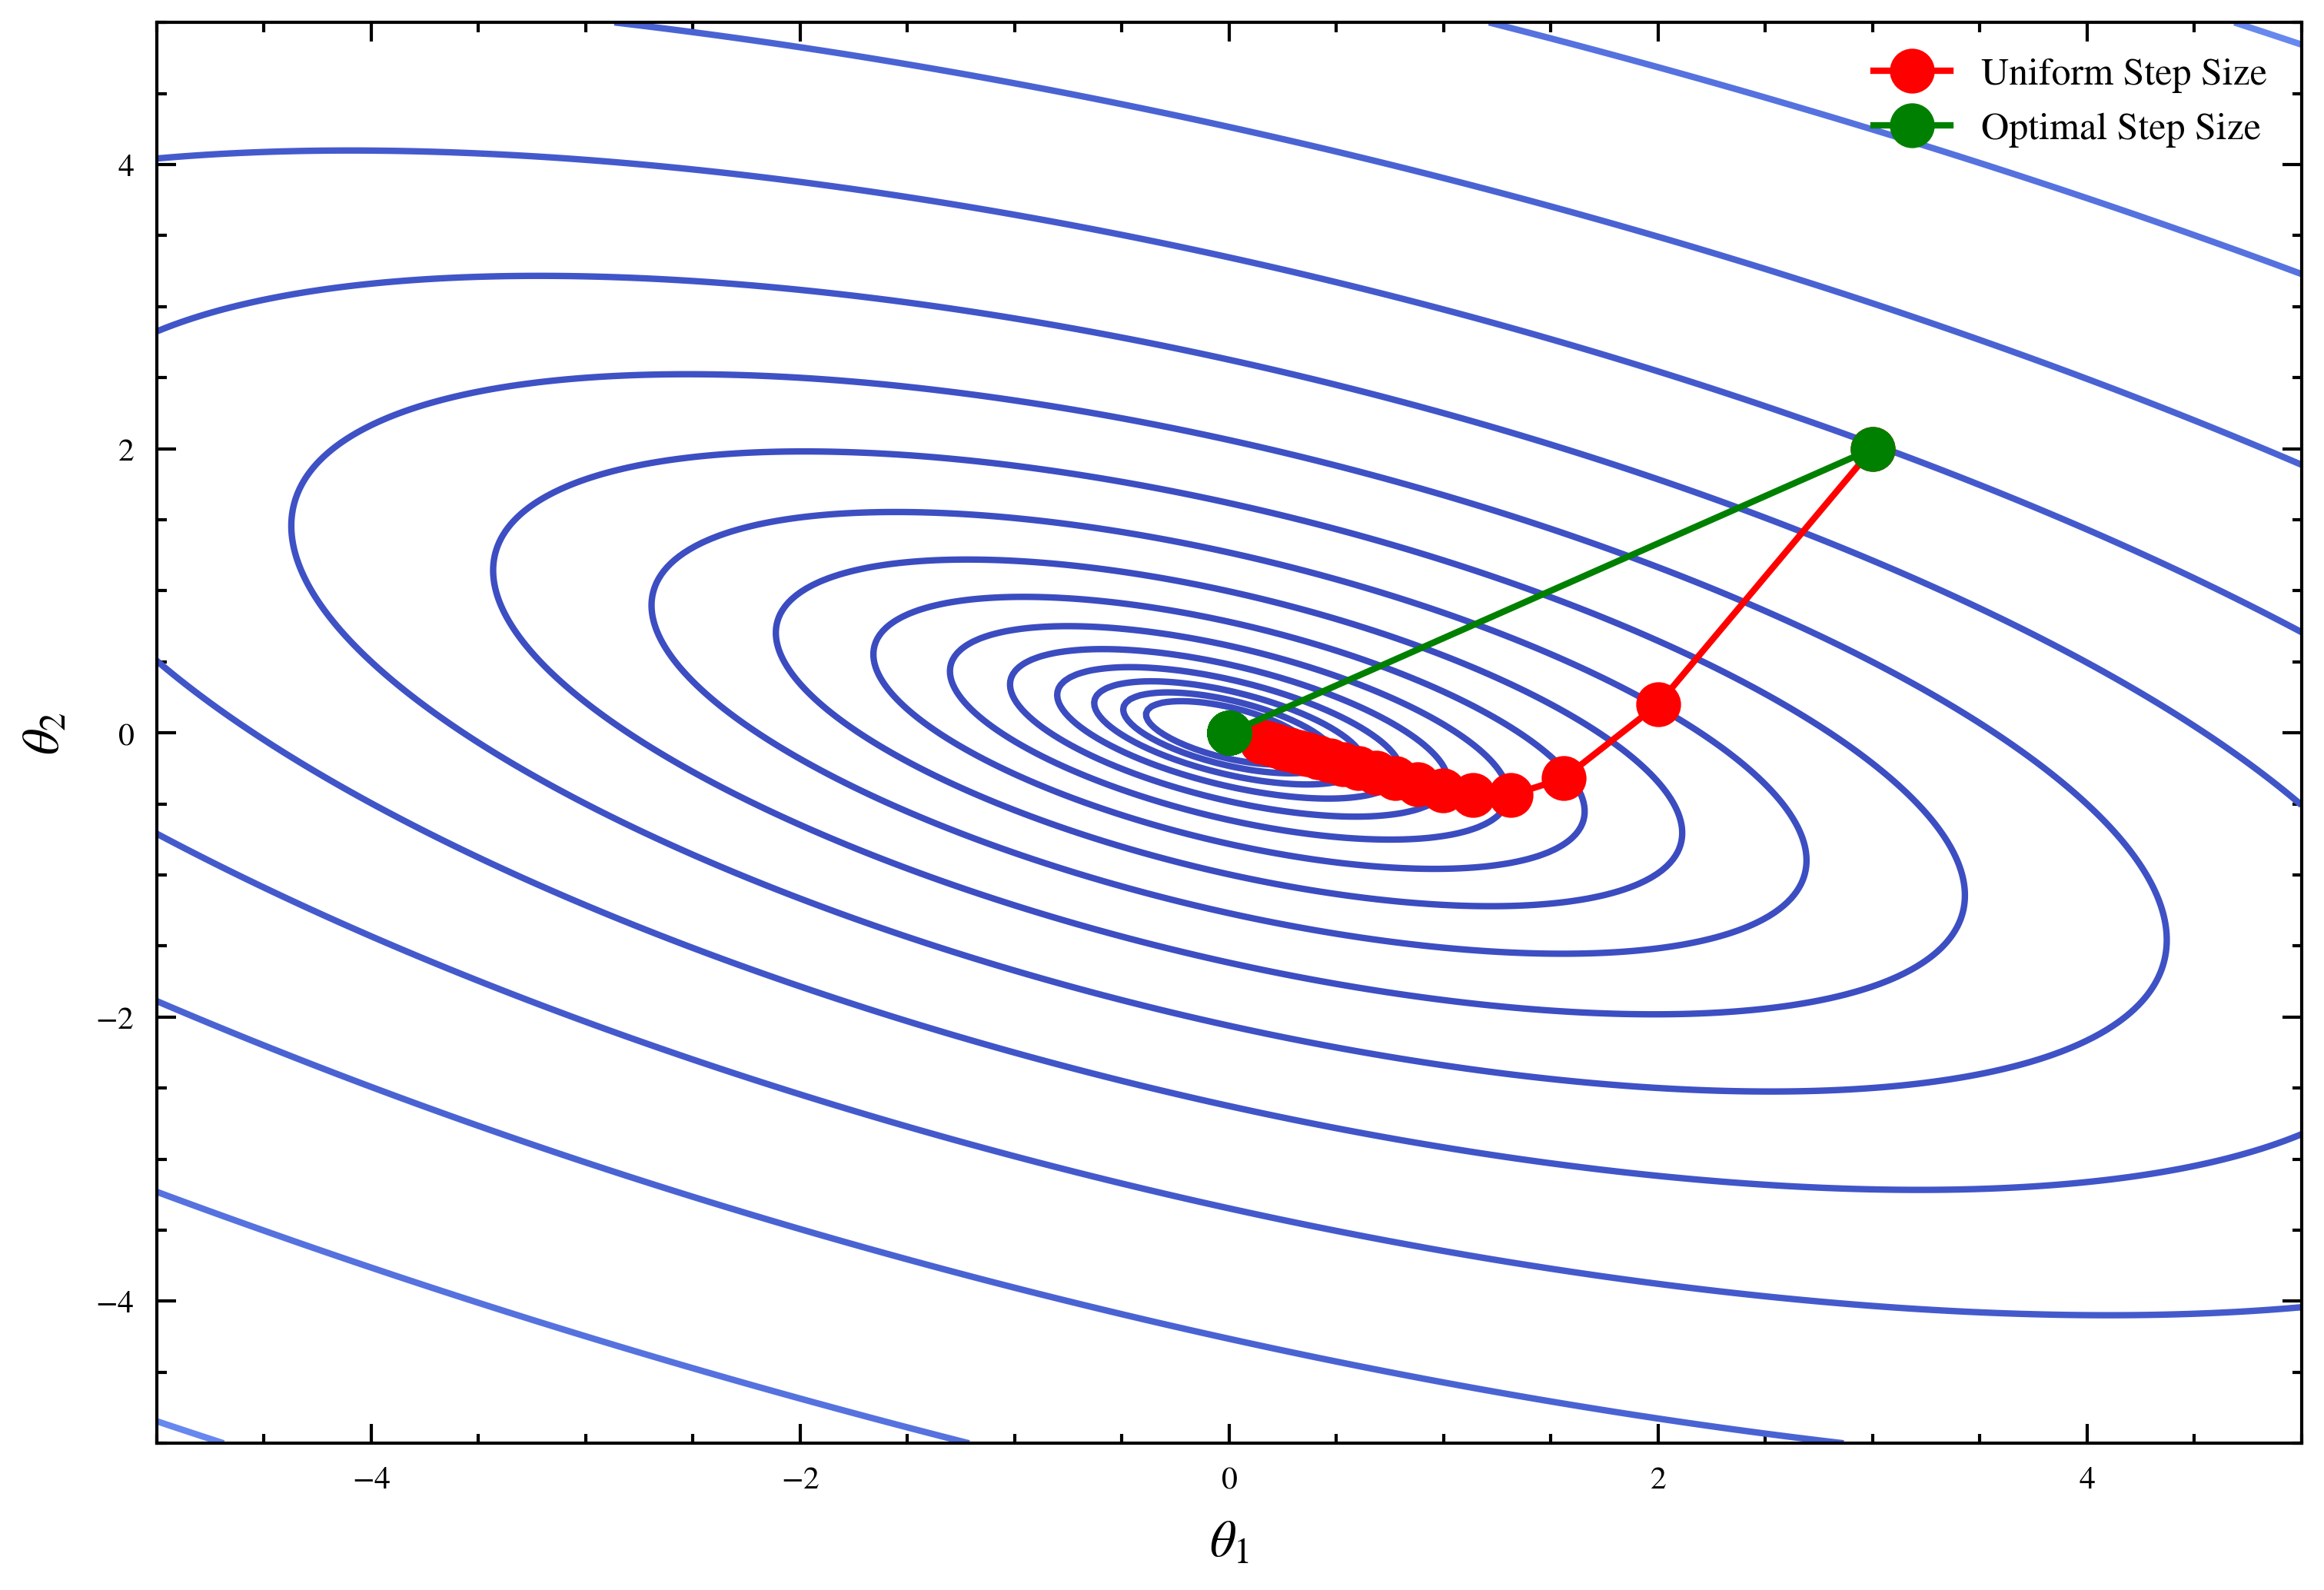

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(w, b):
    return w**2 + 2*w*b + 3*b**2

# Gradient of the loss function
def gradient(w, b):
    dw = 2*w + 2*b
    db = 2*w + 6*b
    return np.array([dw, db])

# Initial guess
w, b = 3.0, 2.0

# Learning rate for uniform step size
learning_rate_uniform = 0.1

# Number of iterations
iterations = 20

# Lists to store the trajectory of parameters
w_uniform, b_uniform = [w], [b]
w_optimal, b_optimal = [w], [b]

# Gradient Descent with uniform step size
for _ in range(iterations):
    grad = gradient(w, b)
    w -= learning_rate_uniform * grad[0]
    b -= learning_rate_uniform * grad[1]
    w_uniform.append(w)
    b_uniform.append(b)

# Reset initial guess
w, b = 3.0, 2.0

# Gradient Descent with optimal step size using Hessian
for _ in range(iterations):
    grad = gradient(w, b)
    hessian = np.array([[2, 2], [2, 6]])  # Hessian matrix
    step = -np.linalg.inv(hessian).dot(grad)
    w += step[0]
    b += step[1]
    w_optimal.append(w)
    b_optimal.append(b)

# Plot the loss function landscape
w_vals = np.linspace(-5, 5, 400)
b_vals = np.linspace(-5, 5, 400)
W, B = np.meshgrid(w_vals, b_vals)
Z = loss_function(W, B)





plt.figure(figsize=(6, 4))
plt.contour(W, B, Z, levels=np.logspace(-1, 3, 20), cmap='coolwarm')
plt.plot(w_uniform, b_uniform, 'ro-', label='Uniform Step Size')
plt.plot(w_optimal, b_optimal, 'go-', label='Optimal Step Size')
# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel(r'$\theta_1$', fontsize=10)
ax.set_ylabel(r'$\theta_2$',  fontsize=10)
ax.set_title('', fontsize=10)
#set size for legend
ax.legend(prop={'size': 12})
#set size for axis names
plt.tick_params(labelsize=5)
ax.grid(True)
# save plot
# Display the plot
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('')
plt.legend()
plt.savefig('step_size.pdf')
plt.show()


In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(w, b):
    return w**2 + 2*w*b + 3*b**2

# Gradient of the loss function
def gradient(w, b):
    dw = 2*w + 2*b
    db = 2*w + 6*b
    return np.array([dw, db])

# Initial guess
w, b = 3.0, 2.0

# Learning rate for uniform step size
learning_rate_uniform = 0.1

# Number of iterations
iterations = 20

# Lists to store the trajectory of parameters
w_uniform, b_uniform = [w], [b]
w_optimal, b_optimal = [w], [b]
convergence_threshold = 1e-6

# Initialize counters for convergence iterations
iterations_uniform = 0
iterations_optimal = 0

# Gradient Descent with uniform step size
for _ in range(iterations):
    grad = gradient(w, b)
    w_old, b_old = w, b
    w -= learning_rate_uniform * grad[0]
    b -= learning_rate_uniform * grad[1]
    iterations_uniform += 1
    if np.linalg.norm(np.array([w, b]) - np.array([w_old, b_old])) < convergence_threshold:
        break

# Reset initial guess
w, b = 3.0, 2.0

# Gradient Descent with optimal step size using Hessian
for _ in range(iterations):
    grad = gradient(w, b)
    hessian = np.array([[2, 2], [2, 6]])  # Hessian matrix
    step = -np.linalg.inv(hessian).dot(grad)
    w_old, b_old = w, b
    w += step[0]
    b += step[1]
    iterations_optimal += 1
    if np.linalg.norm(np.array([w, b]) - np.array([w_old, b_old])) < convergence_threshold:
        break

print(f"Uniform Step Size Converged in {iterations_uniform} iterations")
print(f"Optimal Step Size Converged in {iterations_optimal} iterations")


Uniform Step Size Converged in 20 iterations
Optimal Step Size Converged in 2 iterations
